# Importing the Packages

In [6]:
import numpy as np
import pandas as pd

# Data Exploration

In [7]:
# Read student data
data = pd.read_csv("data/data.csv")

In [8]:
data.head()

,S.No,Name,Age,Gender,chol,BloodPressure,BMI,Disease
0,1,Shiva,35,Male,233,72,33.6,Cardiovascular disease (CVD)
1,2,Shekar,32,Male,250,66,26.6,Heart condition
2,3,Mounika,38,Female,204,64,23.3,Hypertension
3,4,Manoj Kumar,28,Male,236,66,28.1,Chronic kidney disease
4,5,MADAGONOLU VAISHNAVI,25,Female,354,40,43.1,Diabetes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.No           69 non-null     int64  
 1   Name           69 non-null     object 
 2   Age            69 non-null     int64  
 3   Gender         69 non-null     object 
 4   chol           69 non-null     int64  
 5   BloodPressure  69 non-null     int64  
 6   BMI            69 non-null     float64
 7   Disease        69 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 4.4+ KB


# Visualization

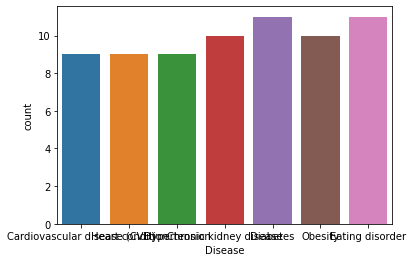

In [10]:
import seaborn as sns
sns.countplot(x="Disease", data = data)

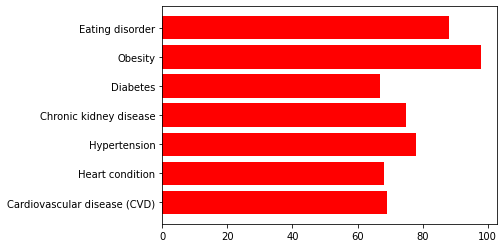

In [33]:
import matplotlib.pyplot as plt

x = np.array(data["Disease"])
y = np.array(data["Age"])
plt.barh(x, y, color = "red")
plt.show()

# Data Cleaning

In [11]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Name']= label_encoder.fit_transform(data['Name'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Disease']= label_encoder.fit_transform(data['Disease'])

data['Name'].unique()
data['Gender'].unique()
data['Disease'].unique()

array([0, 4, 5, 1, 2, 6, 3])

# EDA-After Processing

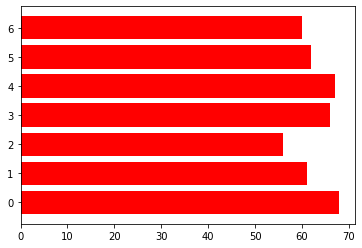

In [12]:
import matplotlib.pyplot as plt

x = np.array(data["Disease"])
y = np.array(data["Name"])
plt.barh(x, y, color = "red")
plt.show()

In [13]:
print(data.shape)

(69, 8)


# Feature Selection

In [14]:
X = data.iloc[:, 2:7]
y = data.iloc[:,7]

# Data Splitting

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Machine Learning

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]


In [18]:
val1 = accuracy_score(y_test, predictions) *100
print(val1)

100.0


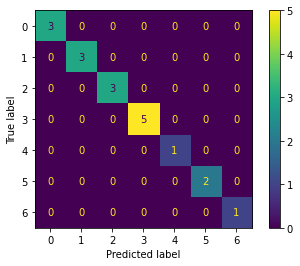

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()

plt.show()

In [20]:
print("Classification Report for RF: ")
print(classification_report(y_test, predictions))

Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Decision Tree Classifier

In [21]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X, y)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]


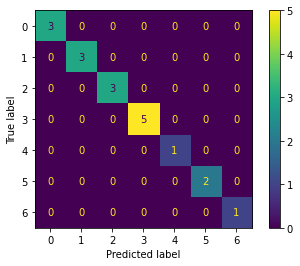

In [22]:
cm = confusion_matrix(y_test, predictions, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()

plt.show()

In [23]:
val2 = accuracy_score(y_test, predictions) *100
print(val2 )

100.0


In [24]:
print("Classification Report for DT: ")
print(classification_report(y_test, predictions))

Classification Report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Voting Classifier

In [25]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]]


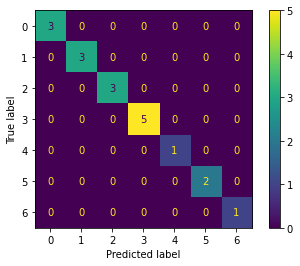

In [26]:
cm = confusion_matrix(y_test, predictions, labels=eclf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf1.classes_)
disp.plot()

plt.show()

In [27]:
val3 = accuracy_score(y_test, predictions) *100
print(val3 )

100.0


In [28]:
print("Classification Report for VOT: ")
print(classification_report(y_test, predictions))

Classification Report for VOT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Accuracy Comparsion

In [29]:
score = [val1,val2,val3 ]

In [30]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2]
[100.0, 100.0, 100.0]


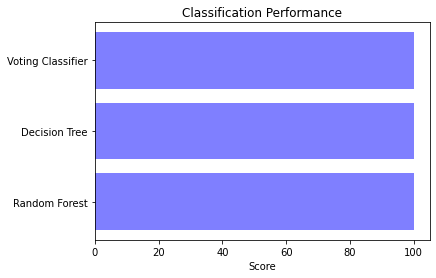

In [31]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [32]:
import joblib
filename = 'model.sav'
joblib.dump(DT, filename)

['model.sav']